In [1]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

# Import data

In [4]:
PATH = ""
FILE_NAME = "my_spotify_tracks.csv"

In [6]:
ID_COLUMNS = ["type", "id", "uri", "track_href", "analysis_url"]
COMPUTED_FEATURES_COLUMNS = ["danceability",
                             "energy",
                             "speechiness",
                             "acousticness",
                             "instrumentalness",
                             "liveness",
                             "valence"]
INTRISIC_FEATURES_COLUMNS = ["tempo", "loudness", "duration_ms"]
OTHER_FEATURES_COLUMNS = ["time_signature", "key", "mode"]

SELECTED_FEATURES_COLUMNS = COMPUTED_FEATURES_COLUMNS + INTRISIC_FEATURES_COLUMNS
ALL_FEATURES_COLUMNS = SELECTED_FEATURES_COLUMNS + OTHER_FEATURES_COLUMNS


In [7]:
df = pd.read_csv(os.path.join(PATH, FILE_NAME)).drop(columns=["Unnamed: 0"])
X = df[COMPUTED_FEATURES_COLUMNS]

# Analysis

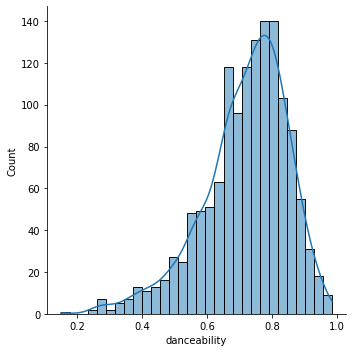

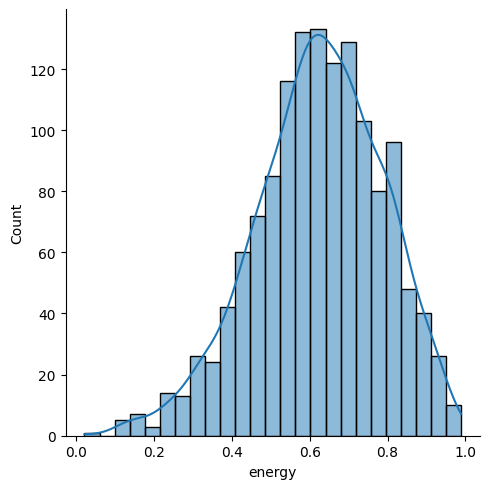

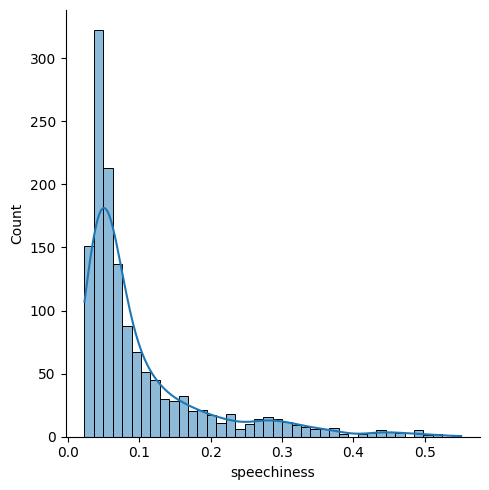

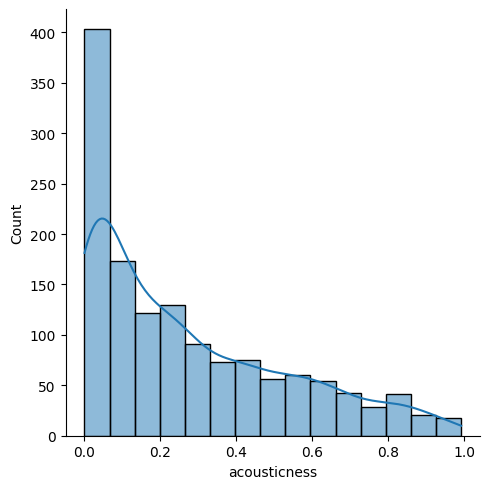

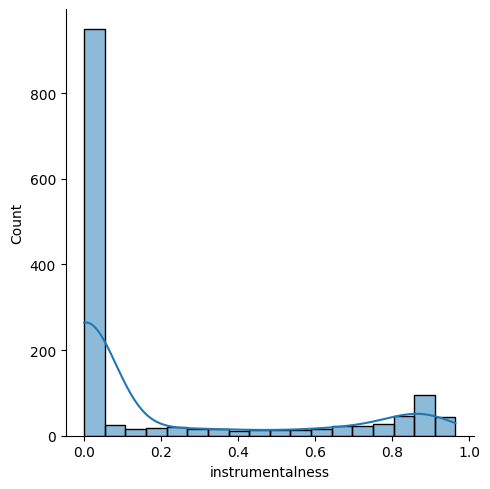

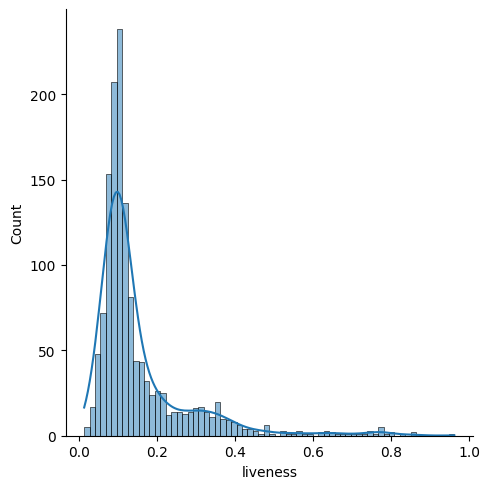

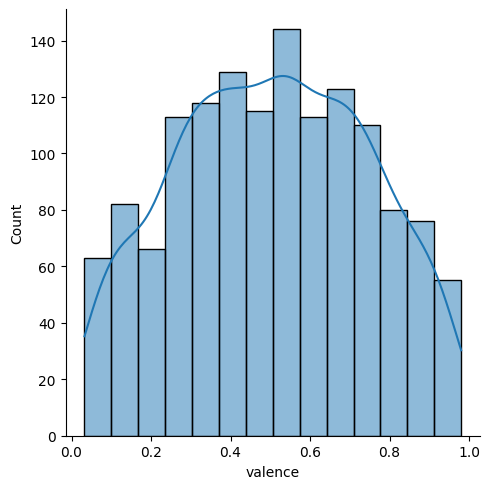

In [8]:
for column in COMPUTED_FEATURES_COLUMNS:
    sns.displot(data=df, x=column, kde=True)
    plt.plot();

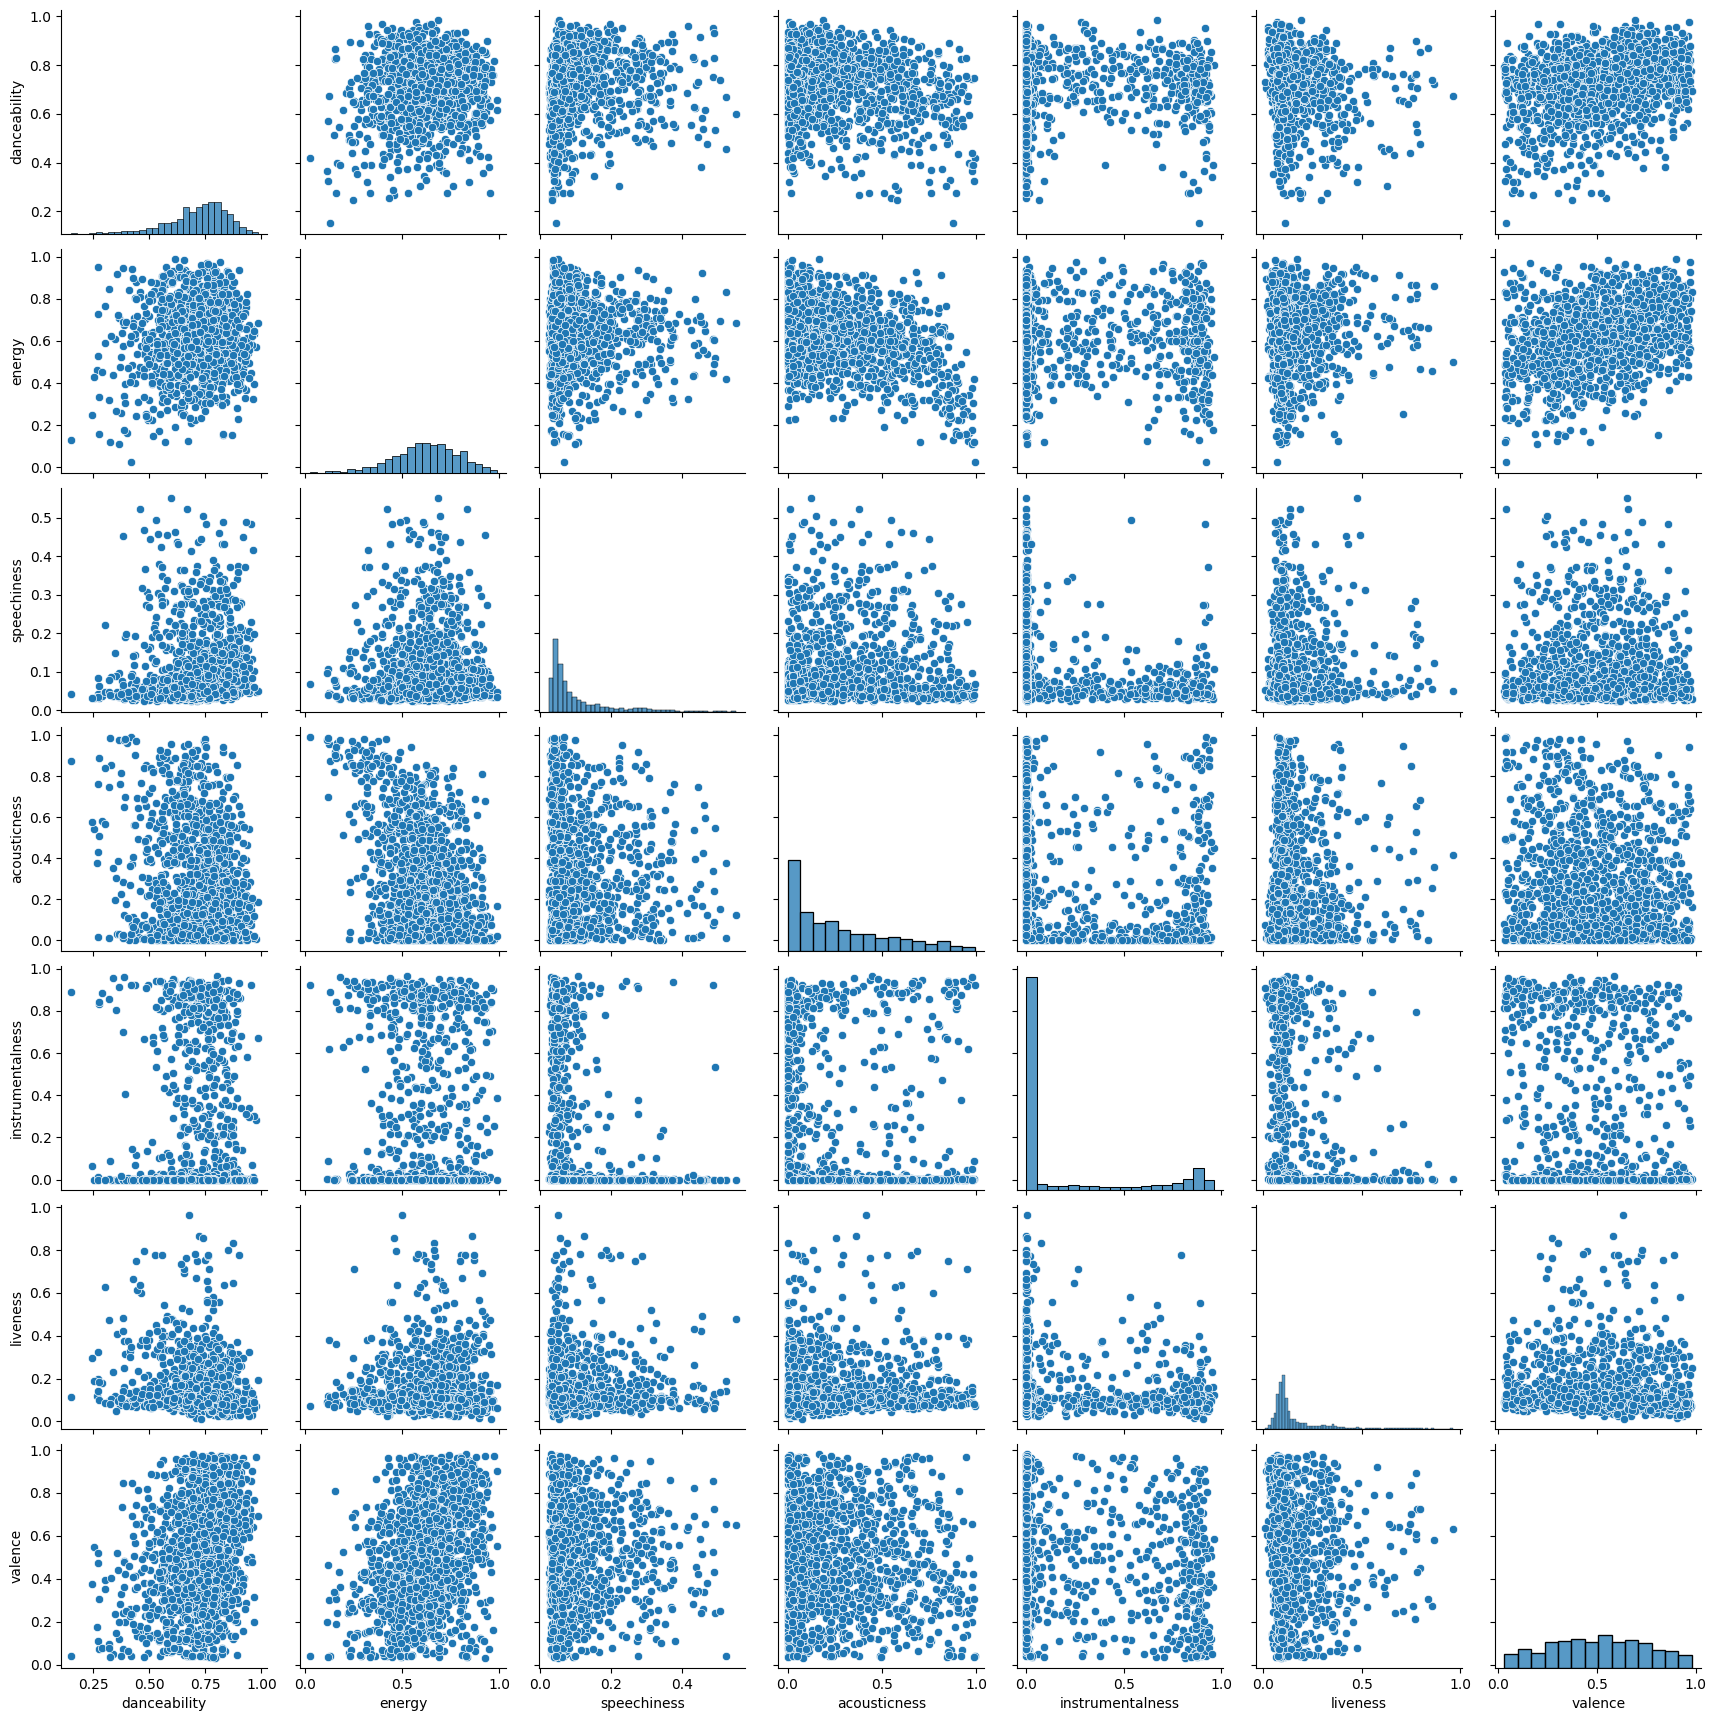

In [9]:
sns.pairplot(X)

# PCA For dimension reduction

In [10]:
import numpy as np
from sklearn.decomposition import PCA

In [11]:
pca = PCA()
pca.fit(X)

U = np.transpose(pca.components_) # vecteurs propres
C = pd.DataFrame(X.dot(U), index=X.index) # nouvelles coordonnées
I = pd.DataFrame(np.transpose(pca.explained_variance_ratio_))  # information véhiculée

correlations = pd.DataFrame([[C[facteur].corr(X[column]) for facteur in C] for column in X], index=X.columns)
quality = (C**2).div((X**2).sum(axis=1), axis='index')

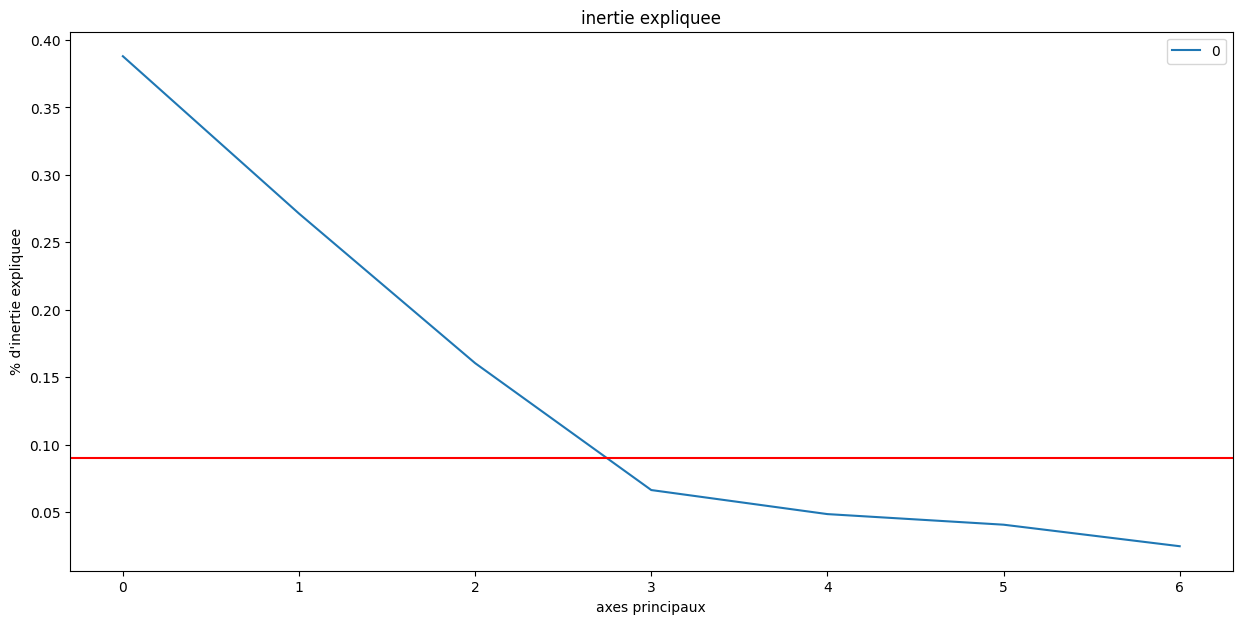

In [12]:
fig, ax = plt.subplots(figsize=(15, 7)) 

I.plot(ax=ax)

plt.title("inertie expliquee")
plt.xlabel("axes principaux")
plt.ylabel("% d'inertie expliquee")

plt.axhline(0.09, color="red")

plt.show() 

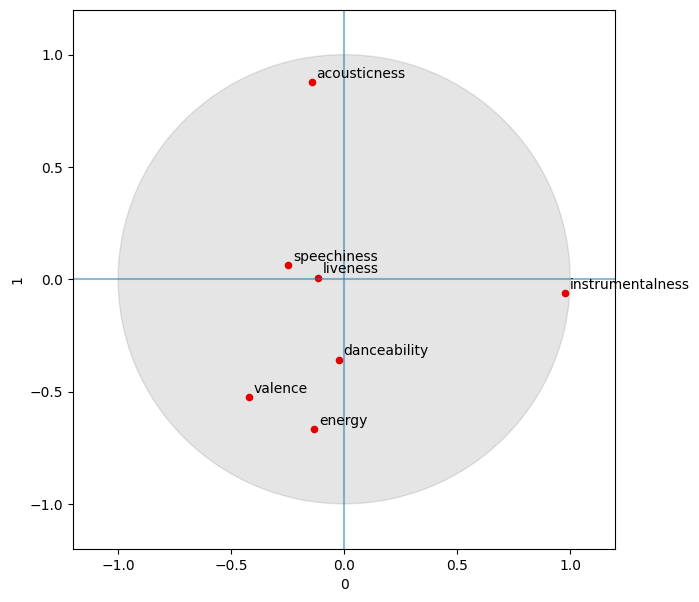

In [13]:
fig, ax = plt.subplots(figsize=(7, 7)) 

draw = correlations[:20].plot.scatter(x=0, y=1, ax=ax, color="red")


for index, row in correlations[:20].iterrows():
    draw.annotate(str(index), (row[0]+0.02, row[1]+0.02))

draw.add_patch(plt.Circle((0, 0), radius=1, color=(0, 0, 0, .1)))

plt.xlim(-1.2, 1.2)
plt.ylim(-1.2, 1.2)
plt.axvline(0, alpha=0.5)
plt.axhline(0, alpha=0.5)

plt.show()

In [14]:
C

,0,1,2,3,4,5,6
0,0.078592,-0.804049,0.851547,0.161911,-0.404125,0.772810,-0.114854
1,-0.323864,-0.761921,0.788164,-0.078516,-0.307769,0.828351,0.091023
2,0.401787,-0.879284,0.953314,0.183024,-0.424974,0.785080,-0.071405
3,0.057498,-0.682812,0.559151,0.303098,-0.430655,0.715562,-0.089631
4,0.648326,-0.445436,0.387803,0.058444,-0.300973,0.858636,-0.085861
...,...,...,...,...,...,...,...
1382,-0.171391,-0.133757,0.478691,0.136658,-0.339242,0.724856,-0.119544
1383,-0.343685,-0.339360,0.954301,0.114479,-0.351905,0.819905,-0.085231
1384,-0.198182,-0.173111,0.566322,0.090734,-0.309457,0.760898,-0.150096
1385,-0.228340,-0.090505,0.675875,0.071824,-0.384684,0.846843,-0.120094


/Users/johan/Documents/Code/Spotify/venv/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


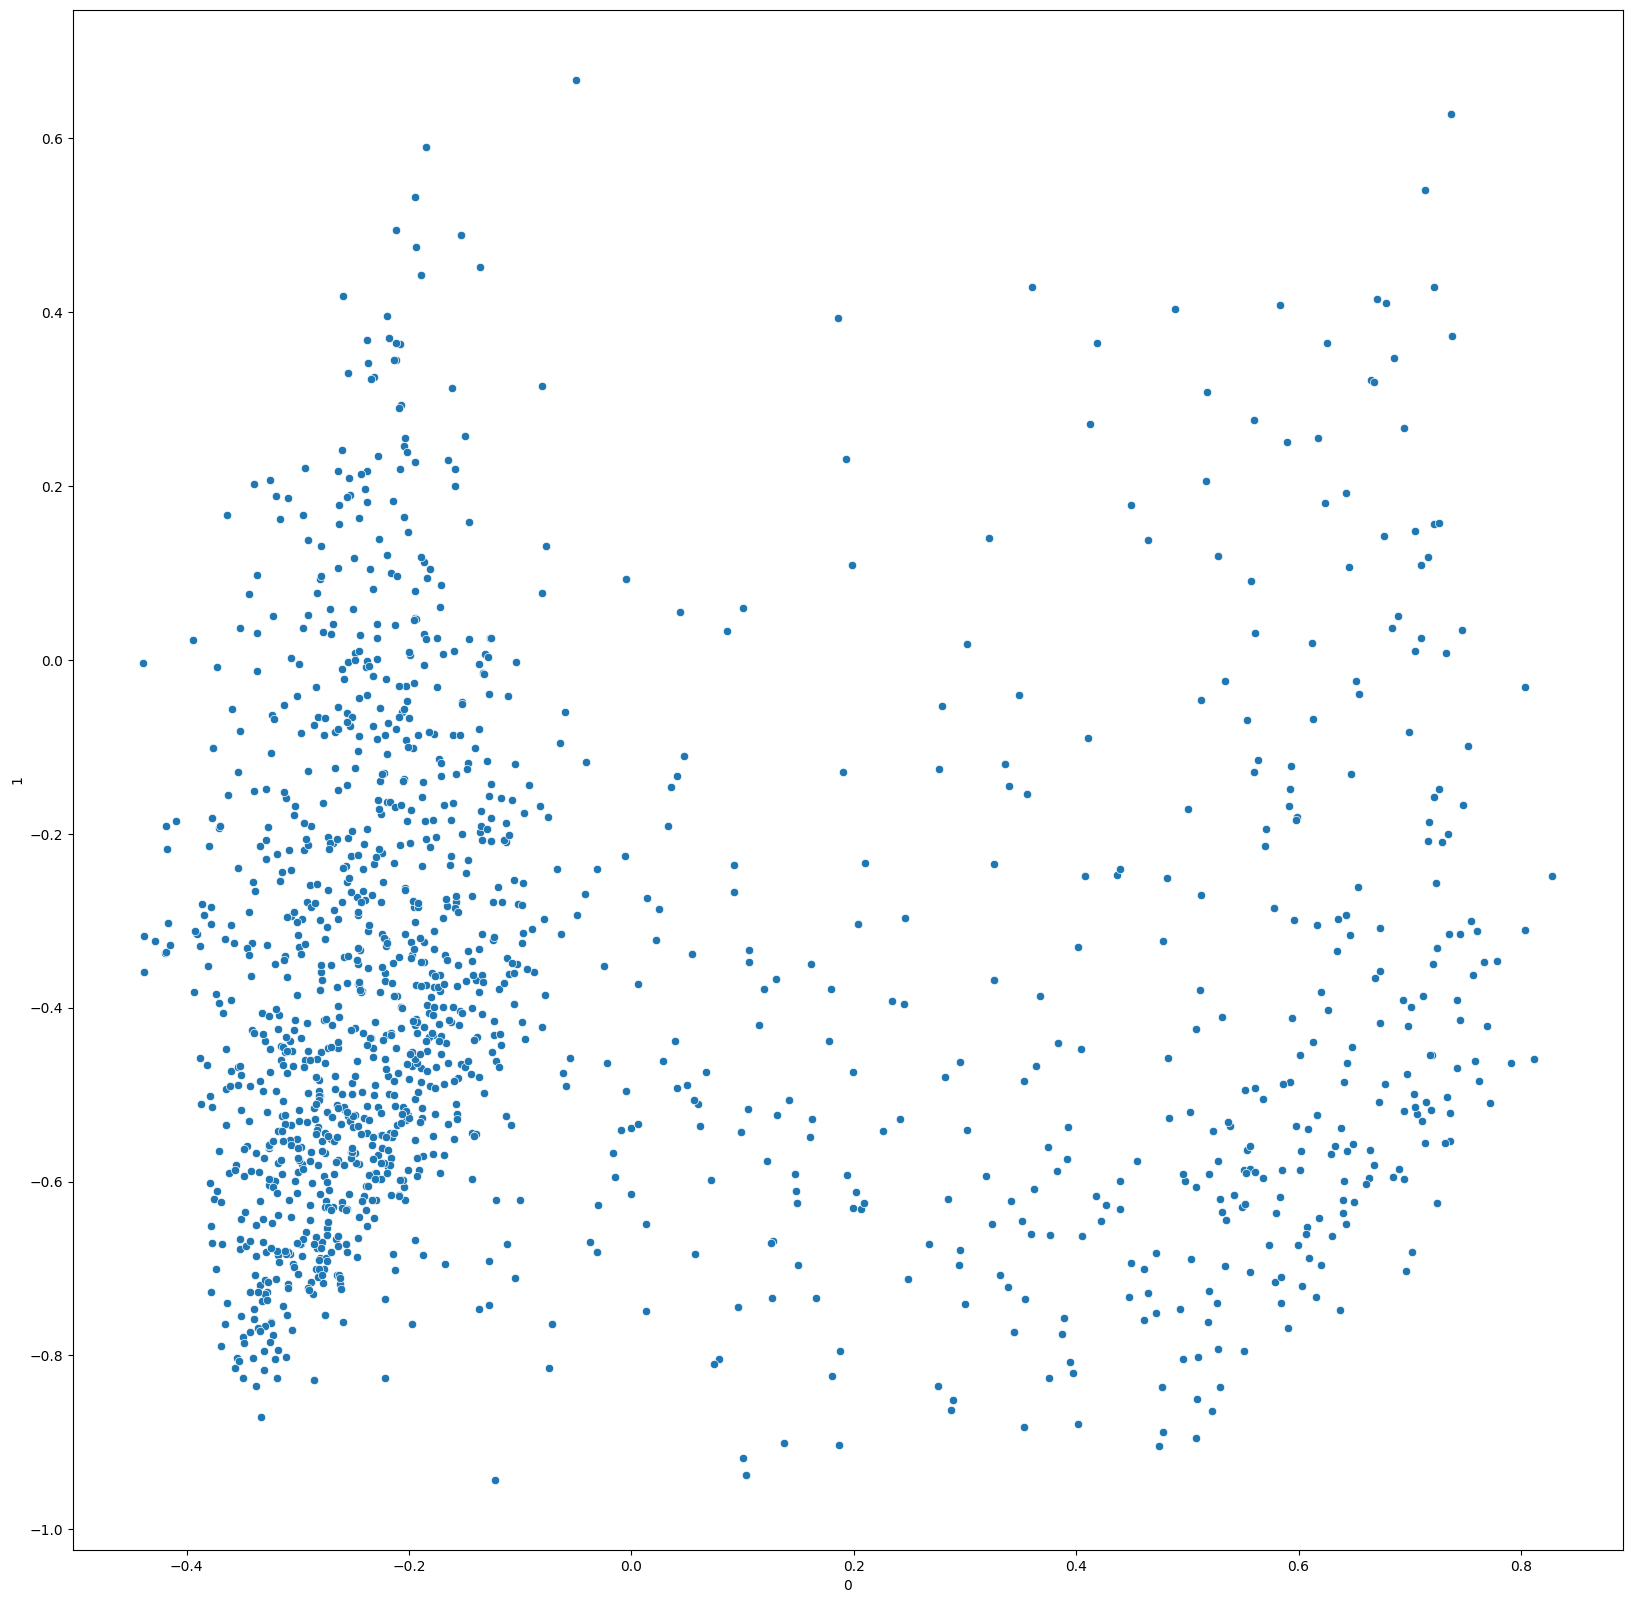

In [15]:
# C["Track"]=df_vectors["Id"]

fig, ax = plt.subplots(figsize=(20, 20)) 
draw = sns.scatterplot(C[0],C[1]);

#for index, row in C[:30].iterrows():
#    draw.annotate(row["Keyword"], (row[0]+0.02, row[1]+0.02))

# Analyse Playlists Dataset for training

Example with latino and techno playlists

In [16]:
FILE_NAME = "playlist_tracks.csv"
Y_COLUMN_NAME = "genre"

In [17]:
df = pd.read_csv(os.path.join(PATH, FILE_NAME)).drop(columns=["Unnamed: 0"])
X = df[SELECTED_FEATURES_COLUMNS+[Y_COLUMN_NAME]]

In [18]:
# sns.pairplot(data=X, hue="genre")

# Try models

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
    "Gradient Boost"
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
    LogisticRegression(),
    GradientBoostingClassifier()
]

In [20]:
X= df[SELECTED_FEATURES_COLUMNS]
y= df[Y_COLUMN_NAME]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [21]:
def run_model(clf):
    model_name = type(clf).__name__
    clf.fit(X_train, y_train)
    y_pred_test = clf.predict(X_test)
    y_pred_train = clf.predict(X_train)
    print(model_name)
    print(f"Train accuracy= {accuracy_score(y_train, y_pred_train)}")
    print(f"Test accuracy= {accuracy_score(y_test, y_pred_test)}")
    print(clf.classes_)
    print(confusion_matrix(y_test, y_pred_test))
    print("\n")
    return clf

In [22]:
results = {}
for clf in classifiers:
    run_model(clf)

KNeighborsClassifier
Train accuracy= 0.6564885496183206
Test accuracy= 0.4090909090909091
['French Songs' 'House' 'Latino' 'Techno']
[[ 7  3  8  0]
 [ 7  7  5  3]
 [ 7  2 14  4]
 [ 7  2  4  8]]


SVC
Train accuracy= 0.45038167938931295
Test accuracy= 0.4090909090909091
['French Songs' 'House' 'Latino' 'Techno']
[[ 4  1 13  0]
 [ 2  2  6 12]
 [ 1  2 23  1]
 [ 4  1  9  7]]


SVC
Train accuracy= 1.0
Test accuracy= 0.3068181818181818
['French Songs' 'House' 'Latino' 'Techno']
[[ 0  0 18  0]
 [ 0  0 22  0]
 [ 0  0 27  0]
 [ 0  0 21  0]]


GaussianProcessClassifier
Train accuracy= 1.0
Test accuracy= 0.26136363636363635
['French Songs' 'House' 'Latino' 'Techno']
[[ 0  0  0 18]
 [ 0  0  0 22]
 [ 0  0  2 25]
 [ 0  0  0 21]]


DecisionTreeClassifier
Train accuracy= 0.9618320610687023
Test accuracy= 0.6818181818181818
['French Songs' 'House' 'Latino' 'Techno']
[[12  1  5  0]
 [ 0 12  4  6]
 [ 1  2 23  1]
 [ 2  6  0 13]]


RandomForestClassifier
Train accuracy= 0.9618320610687023
Test accuracy= 0.

## Try further with GBoost

In [23]:
clf = GradientBoostingClassifier()
run_model(clf);

GradientBoostingClassifier
Train accuracy= 1.0
Test accuracy= 0.7727272727272727
['French Songs' 'House' 'Latino' 'Techno']
[[14  1  3  0]
 [ 0 13  3  6]
 [ 0  0 27  0]
 [ 1  6  0 14]]




In [26]:
y_predict_proba = clf.predict_proba(X_test) 
y_predict = clf.predict(X_test)
y_good = y_predict == y_test 
list(zip(list(map(max, y_predict_proba)), y_good))

[(0.9951135109176455, False),
 (0.9998411836829793, True),
 (0.9999666302570659, True),
 (0.99996147313378, True),
 (0.9999356167733338, True),
 (0.8185018875497305, False),
 (0.5176929827849373, False),
 (0.3522408891045814, False),
 (0.9999477604626646, True),
 (0.601571162993796, True),
 (0.9980152411672287, False),
 (0.9965238783691825, True),
 (0.9999340284950005, True),
 (0.8561896951179488, True),
 (0.999896549665035, True),
 (0.7377169511165906, True),
 (0.9998043904308671, False),
 (0.9999698750132582, True),
 (0.9907192602742229, False),
 (0.9999412405657228, True),
 (0.99535446354465, True),
 (0.9986356696217932, True),
 (0.9957486204124653, True),
 (0.999909417305531, True),
 (0.9976156386925847, True),
 (0.9978505419675957, False),
 (0.9960305350061388, True),
 (0.9996114520262436, True),
 (0.9999314478185236, True),
 (0.931529103699024, False),
 (0.7026968514537967, True),
 (0.9999593375475347, True),
 (0.9520670466925412, False),
 (0.9999536665979519, True),
 (0.93437426

# Test with new songs

In [27]:
FILE_NAME = "test_tracks.csv"
df_test_tracks = pd.read_csv(os.path.join(PATH, FILE_NAME)).drop(columns=["Unnamed: 0"])
X = df_test_tracks[SELECTED_FEATURES_COLUMNS]

In [28]:
clf.predict(X)

array(['House', 'House', 'Techno', 'Latino', 'French Songs', 'Techno',
       'House'], dtype=object)